## Milestone 2 Example Solution: Feature engineering to prepare audio data for deep learning

_Plot the spectrum of an entire example clip from the speech command dataset. Let the x-axis show the frequency in Hz._

In [1]:
#Import required libraries and define the same variables used in the setup notebook
import numpy
from pathlib import Path
from IPython.display import Audio
import pandas
import librosa
import matplotlib.pyplot as plt

current_dir = Path('.')
data_path = current_dir / 'google_speech'
train_audio_path = data_path / 'train' / 'audio'
train_data = pandas.read_csv(data_path / "train" / "train.csv")
example_audio_path = train_audio_path / 'zero' / 'ffd2ba2f_nohash_1.wav'

In [2]:
example_audio, sample_rate = librosa.load(example_audio_path, sr=None)

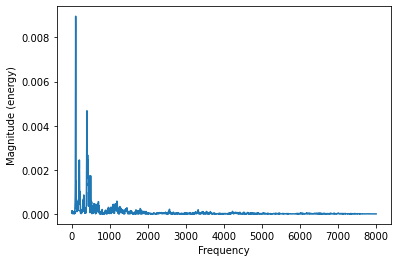

In [3]:
plt.magnitude_spectrum(example_audio, Fs=sample_rate);

_Find existing implementations of the Mel spectrogram, for example in the [`librosa`](https://librosa.org/doc/latest/index.html) and [`python_speech_features`](https://github.com/jameslyons/python_speech_features) libraries. Test, understand and evaluate pros and cons of each implementation._

_Write a convenient function that generates the Mel spectrogram of an audio clip to be used throughout your workflow. You may reuse existing functions from the aforementioned libraries._

In [4]:
def mel_spectrogram(
    audio: numpy.ndarray,
    sample_rate: int,
    threshold: int=None,
):
    melspec = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    melspec = librosa.power_to_db(melspec, ref=numpy.max)
    if threshold:
        melspec[melspec < threshold] = -80
    return melspec

In [5]:
def show_spectrogram(
    spectrogram: numpy.ndarray,
    sample_rate: int,
    label: str=""
):
    from librosa.display import specshow
    plt.figure(figsize=(20,3))
    specshow(
        spectrogram,
        x_axis='time',
        y_axis='mel',
        sr=sample_rate,
        fmax=8000
    )
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel-frequency spectrogram: {label}')
    plt.show()


In [6]:
Audio(example_audio_path)

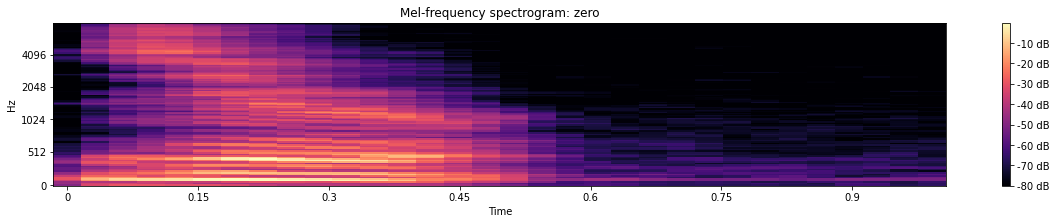

In [7]:

show_spectrogram(
    mel_spectrogram(example_audio, sample_rate),
    sample_rate,
    label="zero"
)

In [8]:
train_data["label"].unique()

array(['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go',
       'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on',
       'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree',
       'two', 'up', 'wow', 'yes', 'zero'], dtype=object)

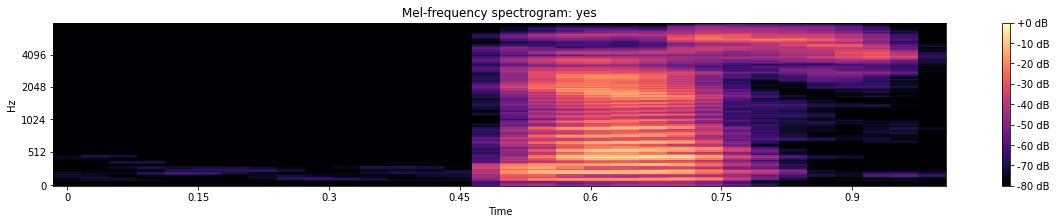

In [9]:
word = "yes"
file_path =  train_data[train_data["label"] == word].sample(n=1)["file_path"].iloc[0]
audio, sample_rate = librosa.load(f"{train_audio_path}/{file_path}", sr=None)
show_spectrogram(
    mel_spectrogram(
        audio,
        sample_rate
    ),
    sample_rate,
    label=word
)

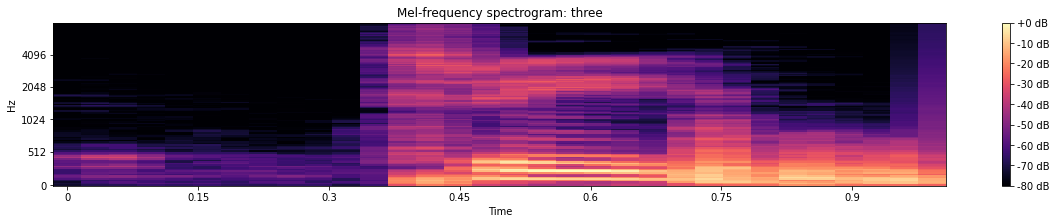

In [10]:
word = "three"
file_path =  train_data[train_data["label"] == word].sample(n=1)["file_path"].iloc[0]
audio, sample_rate = librosa.load(f"{train_audio_path}/{file_path}", sr=None)
show_spectrogram(
    mel_spectrogram(
        audio,
        sample_rate
    ),
    sample_rate,
    label=word
)

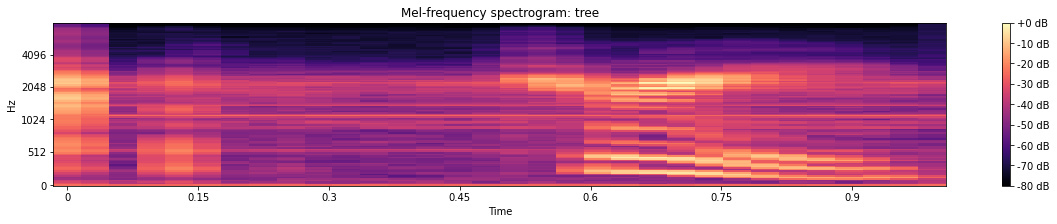

In [11]:
word = "tree"
file_path =  train_data[train_data["label"] == word].sample(n=1)["file_path"].iloc[0]
audio, sample_rate = librosa.load(f"{train_audio_path}/{file_path}", sr=None)
show_spectrogram(
    mel_spectrogram(
        audio,
        sample_rate
    ),
    sample_rate,
    label=word
)

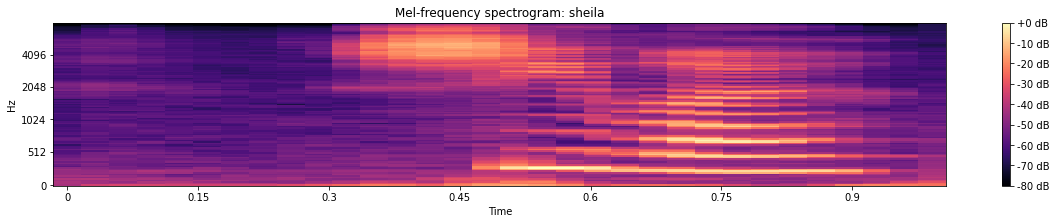

In [12]:
word = "sheila"
file_path =  train_data[train_data["label"] == word].sample(n=1)["file_path"].iloc[0]
audio, sample_rate = librosa.load(f"{train_audio_path}/{file_path}", sr=None)
show_spectrogram(
    mel_spectrogram(
        audio,
        sample_rate
    ),
    sample_rate,
    label=word
)

_Test the scalability of your featurization function: Can it be applied to thousands of audio clips from the speech data set within an acceptable waiting time? Document a few time measurements and the hardware used._

In [13]:
def featurize_clip(file_path):
    audio, sample_rate = librosa.load(f"{train_audio_path}/{file_path}", sr=None)
    spectrogram = mel_spectrogram(audio, sample_rate)
    return spectrogram

In [14]:
%%time
train_data["spectrogram"] = train_data["file_path"].apply(featurize_clip)

CPU times: user 7min 36s, sys: 1min 47s, total: 9min 24s
Wall time: 5min 12s
